<a href="https://colab.research.google.com/github/gabikohen/ejercicio-de-trazado-de-la-matriz-de-confusion-cancer./blob/master/ejercicio_de_trazado_de_la_matriz_de_confusion_%2B_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
## Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay



In [17]:
filename = "/content/drive/MyDrive/Colab Notebooks/Coding dojo/Introducion al Machine learning/Teoria/Clase 1/cancer.csv"
data = pd.read_csv(filename,index_col=0)

In [18]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [20]:
data.duplicated().sum()

0

In [21]:
data.isna().sum().sum()

0

In [22]:
target = "diagnosis"
y = data[target]
X = data.drop(columns = target)

In [23]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
8913,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.620,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
915691,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.410,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
904689,12.960,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,14.130,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247
9110732,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,21.530,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075
881046502,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,23.240,27.84,158.30,1656.0,0.11780,0.29200,0.38610,0.19200,0.2909,0.05865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859711,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
863031,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
8910721,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120


In [24]:
# instanciar el modelo
dec_tree = DecisionTreeClassifier(random_state = 42)
# Entreno el modelo
dec_tree.fit(X_train, y_train)

# evaluo el rendimiento del modelo
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)

# print
print(f'La precisión en el conjunto de entrenamiento es {train_score:.3f}.')
print(f'La precisión en el conjunto de prueba es {test_score:.3f}.')



La precisión en el conjunto de entrenamiento es 1.000.
La precisión en el conjunto de prueba es 0.951.


2) clasificador bagging y un

In [25]:
#  instacio el metodo
bagreg = BaggingClassifier(random_state = 42)

# entreno el metodo
bagreg.fit(X_train, y_train)

# predigo el medolo
bagreg.predict(X_test)
bagreg.predict(X_train)

# evuluo el rendimiento

bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)

# print
print(bagreg_train_score)
print(bagreg_test_score)



0.9929577464788732
0.951048951048951


3) clasificador de bosque aleatorio

para obtener la exactitud más alta posible en el conjunto de prue

In [26]:
#  instacio el metodo
rc= RandomForestClassifier(random_state = 42)

# entreno el metodo
rc.fit(X_train, y_train)

# predigo el medolo
test_preds=rc.predict(X_test)
train_preds=rc.predict(X_train)

# evuluo el rendimiento
train_score = accuracy_score(y_train, train_preds)
test_score = accuracy_score(y_test, test_preds)

# print
print(train_score)
print(test_score)

1.0
0.965034965034965


El mejor modelo predeterminado, según la precisión en el conjunto de prueba, es el RandomForestClassifier
- Training accuracy: 1.0
- Test accuracy: 0.965

1) ¿Cuál fue la precisión del modelo? (Ya deberían haber determinado esto en el ejercicio de árbol de clasificación)

La presicion del modelo accuracy score fue para train de 1 % y para test de 0.96%

Creen la matriz de confusión para responder las siguientes preguntas:

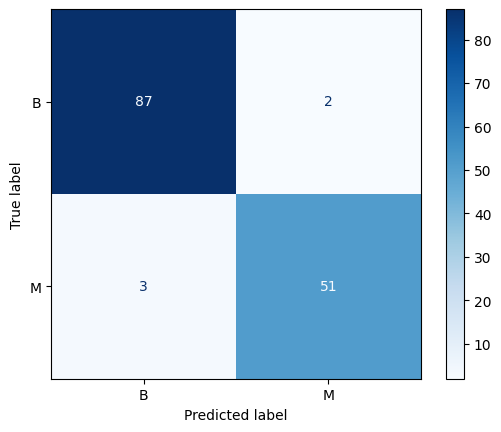

In [30]:
ConfusionMatrixDisplay.from_estimator(rc, X_test, y_test, cmap = 'Blues');

In [31]:
# Exactitud
precisión = (87 + 51) / (87 + 51 + 2 + 3)
print('La precisión de este modelo en el conjunto de prueba es: ', precisión)

La precisión de este modelo en el conjunto de prueba es:  0.965034965034965


2) ¿Qué condición (maligno o benigno) se considera la clase positiva en este conjunto de datos?

Configuré 'M' como la clase positiva, ya que eso es lo que más nos interesa detectar.

3) ¿Cuántos falsos positivos hay?

Hubo 2 falsos positivos

4) ¿Cuántos falsos negativos hay?

Hubo 3 falsos negativos.

5) Para el conjunto de datos de cáncer de mama, ¿cuál creen que sea el más problemático: los falsos positivos o los falsos negativos? Expliquen.  

Los falsos negativos son probablemente más problemáticos que los falsos positivos, ya que representan un cáncer de mama que no se trata.